In [0]:
import numpy as np
import matplotlib.pyplot as plt

# Exercise

In [0]:
first_column = np.arange(0, 40, 10).reshape(4, 1)
print(first_column)

[[ 0]
 [10]
 [20]
 [30]]


In [0]:
second_matrix = first_column + np.arange(0, 4)
print(second_matrix)

[[ 0  1  2  3]
 [10 11 12 13]
 [20 21 22 23]
 [30 31 32 33]]


# Домашнее Задание №1

## 1-e Задание

In [0]:
matrix = np.random.random((10, 3))
print(matrix)

[[0.10326127 0.27861814 0.72643796]
 [0.22698319 0.53891574 0.26629961]
 [0.07185152 0.29497306 0.42204875]
 [0.07690446 0.52572372 0.50376933]
 [0.83080449 0.29083504 0.61802722]
 [0.37657246 0.86883301 0.43239234]
 [0.97213427 0.30826315 0.11760983]
 [0.61553801 0.21528681 0.2486799 ]
 [0.43992505 0.38714298 0.96384419]
 [0.96039794 0.1038601  0.1181074 ]]


In [0]:
matrix  = matrix - 0.5
for i in np.arange(10):
    temp = matrix[i, 0]
    for j in np.arange(3):
        if abs(temp) > abs(matrix[i, j]) :
            temp = matrix[i, j]
    print(temp+0.5)

0.2786181352059435
0.5389157413860705
0.4220487450651196
0.5037693314328269
0.6180272153124882
0.4323923366315391
0.30826315364864443
0.6155380112069218
0.4399250549270697
0.11810739893883115


## 2-е Задание

In [0]:
matrix = np.random.random((6, 6))
print(matrix.sum(axis = 1) / matrix.min(axis = 0))

[ 17.02793206  20.96912698  20.4997036  508.633876     7.22625127
  15.89628132]


## 3-е Задание

In [0]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
t_max = 0
for i in np.arange(x.size):
    if x[i] == 0 and i != x.size - 1:
        if x[i + 1] != 0:
            t_max = max(t_max, x[i+1])
print(t_max)

5


## 4-е Задание

In [0]:
 x = np.ones(10)
 i = np.array([0, 1, 2, 3, 5, 5, 5, 8])
 for j in i:
    x[j] += 1
print(x)

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


## 5-e  Задание

In [0]:
N = 4
a = np.arange(N * N).reshape(N, N)
d = {}
print(a)
if N != 0:
    for k in np.arange(2* N - 1):
        j = k
        t_list = []
        while(j >= 0):
            if(k-j < N and j < N):
                t_list.append(a[k-j, j]) 
            j = j - 1
        d[k] = t_list
print(d)


[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
{0: [0], 1: [1, 4], 2: [2, 5, 8], 3: [3, 6, 9, 12], 4: [7, 10, 13], 5: [11, 14], 6: [15]}


## 6-е Задание

In [0]:
def get_labels(pts, centroids):
    dist = np.hstack([np.linalg.norm(pts - centroid, axis=1).reshape(-1, 1) for centroid in centroids])
    return np.argmin(dist, axis=1)

def norma(obs, centroids, labels):
    sum = 0
    for i in range(centroids.shape[0]):
        sum += abs(np.linalg.norm(obs[i==labels] - centroids[i], axis = 1).sum())
    return sum

In [0]:

def kmeans(obs, k_or_guess, iter = 20, eps = 1e-05):
    centroids = np.random.random((k_or_guess, obs.shape[1]))
    labels = get_labels(obs, centroids)
    norm = norma(obs, centroids, labels)
    min_norm = norm
    t_centroids = centroids
    
    for i in range(iter):
        t_norm = norm
        centroids = np.array([obs[labels == i].mean(axis = 0) for i in range (k_or_guess)])
        labels = get_labels(obs, centroids)
        norm = norma(obs, centroids, labels)
        if t_norm < min_norm:
            t_centroids = centroids
            min_norm = norm
        if abs(norm - t_norm) < eps: 
            break
    return t_centroids

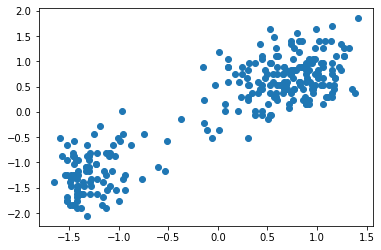

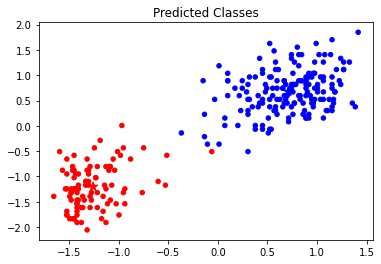

In [5]:
data = np.loadtxt('http://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat', skiprows=26)[:, 1:]
data = (data - data.mean(axis = 0))/data.std(axis = 0)
centroids = np.random.uniform(-2,2,4).reshape((2,2))        
plt.scatter(*data.T)
plt.show()

data = np.loadtxt('http://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat', skiprows=26)[:, 1:]
data = (data - data.mean(axis=0)) / data.std(axis=0)
centroids = kmeans(data, 2)
labels = get_labels(data, centroids)
plt.scatter(*data.T, c=np.where(labels, "blue", "red"), s=20)
plt.scatter(*centroids.T, c=["red", "blue"], s=95, marker='*')
plt.title('Predicted Classes')
plt.show()